# 2 number of replicas

In [57]:
import json 
import numpy as np

file_size = ['10kb', '100kb', '1mb', '10mb']
results = {}

for size in file_size:
    with open(f'11k2/{size}-test-get.postman_test_run.json') as f:
        postman = json.loads(f.read())
        results[size] = postman['results'][0]['times']

        # zero padding to 100
        if (length := len(postman['results'][0]['times'])) < 100:
            results[size] += [0 for _ in range(100 - length)]
    
    # remove 5 smallest and 5 highest
    results[size].sort()
    results[size] = results[size][5:95]

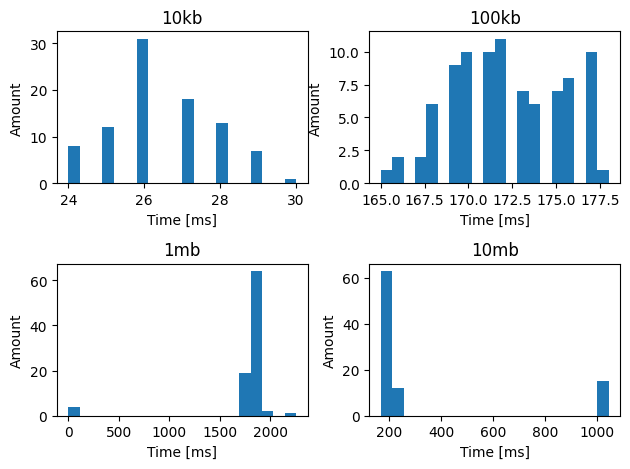

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(results)

fig, ax = plt.subplots(2,2)
ax = np.ravel(ax)

for i, size in enumerate(file_size):
    ax[i].hist(df[size], bins=20)
    ax[i].set_title(size)
    ax[i].set_xlabel('Time [ms]')
    ax[i].set_ylabel('Amount')
fig.tight_layout()

In [150]:
with open('11k2/times.txt', 'r') as f:
    times = f.read()
    
results = {}
for line in times.split('\n'):
    r = line.split(': ')
    
    if len(r) > 1:
        size = r[1].split(',')[0]

    if not len(results.get(size, [])):
        results[size] = []
    
    try:
        results[size].append(float(r[-1]) * 1000)
    except ValueError:
        pass

# remove 5 smallest and 5 highest
for key in results.keys():
    results[key].sort()
    results[key] = results[key][5:95]
    print(key, len(results[key]))

10240 90
102400 90
1048576 90
10485760 90


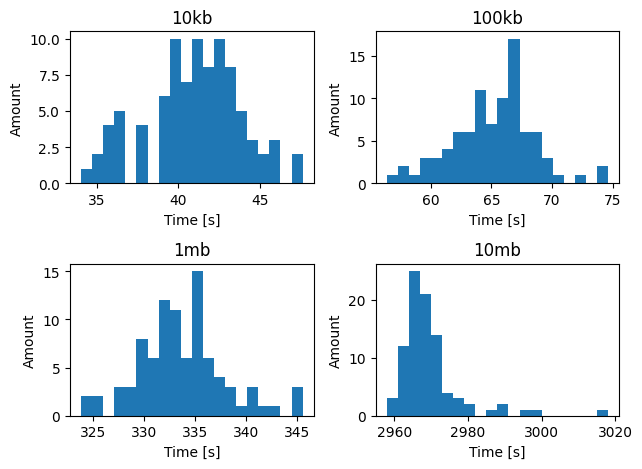

In [162]:
df = pd.DataFrame(results)
df.rename({df.columns[i] : file_size[i] for i in range(len(file_size))}, axis=1, inplace=True)

fig, ax = plt.subplots(2,2)
ax = np.ravel(ax)

for i, size in enumerate(file_size):
    ax[i].hist(df[size], bins=20)
    ax[i].set_title(size)
    ax[i].set_xlabel('Time [s]')
    ax[i].set_ylabel('Amount')
fig.tight_layout()